# Opening and Preparing Images

The examples in the `generators` section have numerous examples on how to generate artificial images, but ultimately most people will be working with real images obtained from X-ray tomography or serial sectioning.  This tutorial will cover a few different aspects about how to open these images for using a Jupyter notebook, or a Python workflow in general.

Let's import the packages and functions that we'll be needing:

In [1]:
import imageio.v2 as imageio
import porespy as ps
import numpy as np
from skimage.io import imread_collection
from matplotlib.pyplot import subplots

## Opening a Folder of 2D tif Images

### Using ImageJ

ImageJ is the ultimate image processing tool kit.  It has many functions and filters for doing quantitative analysis, usually added via plug-ins (see note below), but it's also very good at converting between file types and formats.  

If you have a folder full of 2D images which are either microscope images obtained by serial sectioning or reconstructions of backprojections from X-ray tomography, then you'll want to convert these into a single `tif` image.  `tif` supports 3D images, so all the individual 2D images can be stacked together into a single file.  

This can be done in ImageJ using "File/Import/Image Sequence" as shown in the screenshots below. Note that the images must be named with a numerical value indicating its order in the sequence, like "slice_001.tif". 

![Figure1](https://user-images.githubusercontent.com/5092049/198901662-2d70a8f7-04fe-4a4a-b8cb-8cf41b42cdb3.png)

A dialog box will appear asking you about some of the details, which are usually correct by default:

![Figure2](https://user-images.githubusercontent.com/5092049/198901924-62e2be6a-2c31-4246-8bef-1f779ea0a293.png)

Finally, you'll want to save this new 3d tif image, which can be done with "save as":

![Figure3](https://user-images.githubusercontent.com/5092049/198902015-5d4197b4-610e-4114-8613-07af6067abe2.png)

> **ImageJ and Fiji**
> 
> ImageJ has a plugin architecture to add functionality.  At some point it was realized that most users install numerous plugins, so Fiji was created, which is ImageJ with a large selection of the most popular plugins preinstalled.  The name Fiji is actually a recursive acronym for "Fiji Is Just ImageJ"

### Directly in Python

If you'd rather not get manually involved, then it's also possible to do this in Python.  The `scikit-image` package comes with a handy funciton for just this purpose.  It only takes a few minutes to get used to how it works:

In [2]:
seq = imread_collection("../../docs/_static/images/Sample 1/*.tif")

Now let's inspect the result.  We can see a list of files loaded in the `files` attribute:

In [3]:
seq.files

['../../docs/_static/images/Sample 1\\Sample 1 Carbonized raw data0000.tif',
 '../../docs/_static/images/Sample 1\\Sample 1 Carbonized raw data0001.tif',
 '../../docs/_static/images/Sample 1\\Sample 1 Carbonized raw data0002.tif',
 '../../docs/_static/images/Sample 1\\Sample 1 Carbonized raw data0003.tif',
 '../../docs/_static/images/Sample 1\\Sample 1 Carbonized raw data0004.tif',
 '../../docs/_static/images/Sample 1\\Sample 1 Carbonized raw data0005.tif',
 '../../docs/_static/images/Sample 1\\Sample 1 Carbonized raw data0006.tif',
 '../../docs/_static/images/Sample 1\\Sample 1 Carbonized raw data0007.tif',
 '../../docs/_static/images/Sample 1\\Sample 1 Carbonized raw data0008.tif',
 '../../docs/_static/images/Sample 1\\Sample 1 Carbonized raw data0009.tif',
 '../../docs/_static/images/Sample 1\\Sample 1 Carbonized raw data0010.tif']

And we can access the loaded images from the `seq` object as if it were a list:

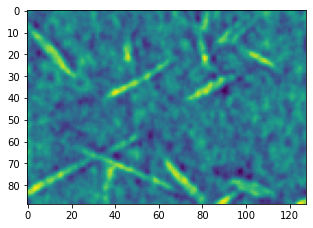

In [4]:
fig, ax = subplots(figsize=[5, 5])
ax.imshow(seq[0]);

We can convert this list into a 3D image as follows:

In [5]:
im3d = np.zeros([*seq[0].shape, len(seq)])
for i, im in enumerate(seq):
    im3d[..., i] = im

And now we can use `porespy` to visualize it:

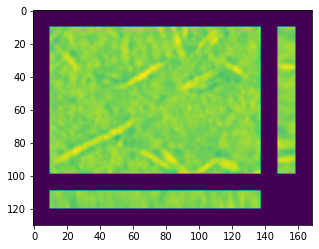

In [6]:
fig, ax = subplots(figsize=[5, 5])
ax.imshow(ps.visualization.show_planes(im3d));

## Convert to Binary

In this tutorial we will not do anything to clean or denoise these images, as that deserves it's own tutorial. Here we'll just apply a threshold to convert a boolean with `True` indicating solid (the fibers above) and `False` indicating void.

First we need to look at the range of values in the image:

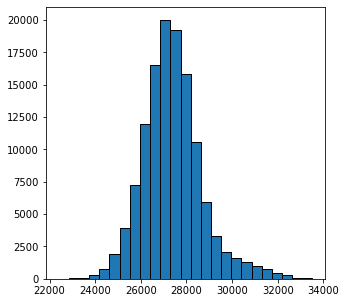

In [7]:
fig, ax = subplots(figsize=[5, 5])
ax.hist(im3d.flatten(), bins=25, edgecolor='k');

From the above histogram we can see that the values span from 22000 to 34000. We can just search for a value which does a decent job of segmenting the solid and void by trial and error:

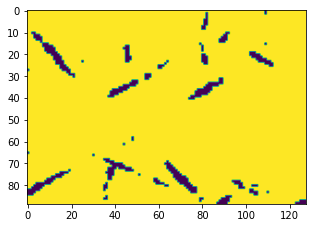

In [8]:
fig, ax = subplots(figsize=[5, 5])
ax.imshow(im3d[..., 0] < 30000);

Because the image is noisy the result is not perfect.  But let's apply this threshold to the entire image now, then visualize the 3D stack:

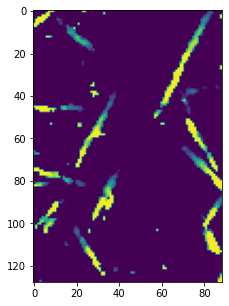

In [9]:
im = im3d < 30000
fig, ax = subplots(figsize=[5, 5])
ax.imshow(ps.visualization.sem(im, axis=2));

## Opening a 3D Stack

Assuming that the 2D images have been turned into a 3D image, as described above, it is straightforward to load them:

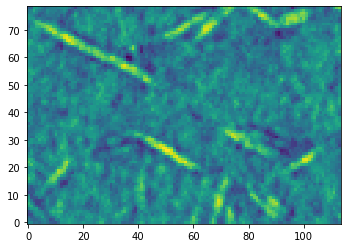

In [10]:
im2 = imageio.volread('../../docs/_static/images/Sample 1.tif')
ps.imshow(im2, axis=0);

## Saving a 3D Image

Once you have created a nice image that you want to save, perhaps for visualization in Paraview, you can also use the `imageio` package:

```
imageio.volsave('my image.tif', np.array(im, dtype=np.int8))
```